In [9]:
import numpy as np
import matplotlib.pyplot as plt
from quantum_tunneling.workflows import run_bound_states, run_field_scan
from quantum_tunneling.wkb import barrier_check
from quantum_tunneling.fields import apply_field

In [10]:
# Config: reuse potentials; pick state index and field strength for slice.
potentials = {
    "cusp": {"kind": "cusp", "params": {"V0": 5.0, "alpha": 0.5}},
    "exp_well": {"kind": "exp_well", "params": {"V0": 5.0, "a": 1.0}},
    "soft_barrier": {"kind": "soft_barrier", "params": {"V0": 5.0}},
    "rough": {"kind": "rough", "params": {"V0": 1.0, "k0": 0.6, "levels": 4, "decay": 0.6}},
}
pot_key = "cusp"
state_index = 0

cfg = {
    "potential": potentials[pot_key],
    "grid": {"L": 50.0, "N": 1200},
    "solver": {"k": 6, "hbar": 1.0, "m": 1.0},
    "F_max": 0.4,
    "F_steps": 16,
}
cfg

{'potential': {'kind': 'cusp', 'params': {'V0': 5.0, 'alpha': 0.5}},
 'grid': {'L': 50.0, 'N': 1200},
 'solver': {'k': 6, 'hbar': 1.0, 'm': 1.0},
 'F_max': 0.4,
 'F_steps': 16}

In [11]:
res = run_bound_states(cfg)
x = res["x"]
Vx = res["Vx"]
E = res["E"]


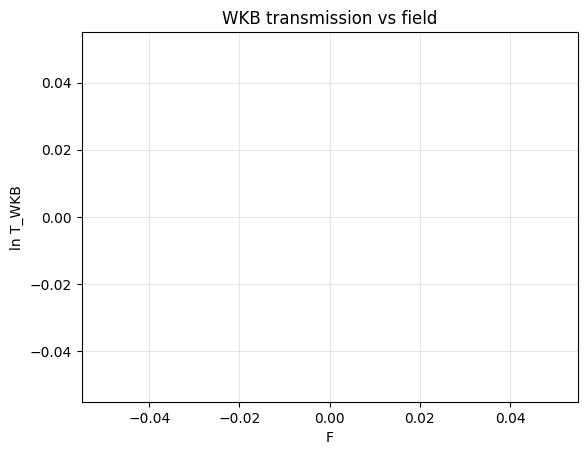

{'status': 'no_closed_barrier', 'barrier': False, 'barrier_top': (49.91673605328893, 34.826721182180705, 1199), 'F': 0.01}
{'status': 'no_closed_barrier', 'barrier': False, 'barrier_top': (49.91673605328893, 33.52888604479519, 1199), 'F': 0.036000000000000004}
{'status': 'no_closed_barrier', 'barrier': False, 'barrier_top': (49.91673605328893, 32.23105090740968, 1199), 'F': 0.062000000000000006}
{'status': 'no_closed_barrier', 'barrier': False, 'barrier_top': (49.91673605328893, 30.933215770024166, 1199), 'F': 0.08800000000000001}
{'status': 'no_closed_barrier', 'barrier': False, 'barrier_top': (49.91673605328893, 29.635380632638654, 1199), 'F': 0.114}
{'status': 'no_closed_barrier', 'barrier': False, 'barrier_top': (49.91673605328893, 28.337545495253142, 1199), 'F': 0.14}
{'status': 'no_closed_barrier', 'barrier': False, 'barrier_top': (49.91673605328893, 27.039710357867627, 1199), 'F': 0.16600000000000004}
{'status': 'no_closed_barrier', 'barrier': False, 'barrier_top': (49.916736053

In [12]:
scan = run_field_scan(cfg, res, state_index=state_index)
records = scan['records']
F_vals = [r['F'] for r in records]
lnT = [np.log(r['T_wkb']) if 'T_wkb' in r else np.nan for r in records]
plt.figure()
plt.plot(F_vals, lnT, marker='o')
plt.xlabel('F')
plt.ylabel('ln T_WKB')
plt.title('WKB transmission vs field')
plt.grid(True, alpha=0.3)
plt.show()
for r in records:
    print(r)

## Notes
- If `status` switches to over-the-barrier, WKB no longer applies.
- Compare ln T slopes across potentials and excited states (change `state_index`).
- Use turning-point spacing to discuss curvature vs cusp behavior.